<a href="https://colab.research.google.com/github/monozi/CCMACLRL_EXERCISES_COM221ML/blob/main/Exercise%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 2

Machine Learning pipeline

1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

2. Load the dataset


In [20]:
#put your answer here
df = pd.read_csv("iris.csv")
print("First 5 rows:\n", df.head())
print("Last 5 rows:\n", df.tail())

First 5 rows:
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Last 5 rows:
       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  


In [21]:
print("Counts:\n", df.value_counts())

Counts:
 Id   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species        
1    5.1            3.5           1.4            0.2           Iris-setosa        1
95   5.6            2.7           4.2            1.3           Iris-versicolor    1
97   5.7            2.9           4.2            1.3           Iris-versicolor    1
98   6.2            2.9           4.3            1.3           Iris-versicolor    1
99   5.1            2.5           3.0            1.1           Iris-versicolor    1
                                                                                 ..
51   7.0            3.2           4.7            1.4           Iris-versicolor    1
52   6.4            3.2           4.5            1.5           Iris-versicolor    1
53   6.9            3.1           4.9            1.5           Iris-versicolor    1
54   5.5            2.3           4.0            1.3           Iris-versicolor    1
150  5.9            3.0           5.1            1.8           Iris-virg

In [22]:
#Removes ID Column
df.drop(columns='Id', inplace=True)
print("First 5 rows:\n", df.head())
print("Last 5 rows:\n", df.tail())

First 5 rows:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
Last 5 rows:
      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [24]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


3. Visualize the dataset

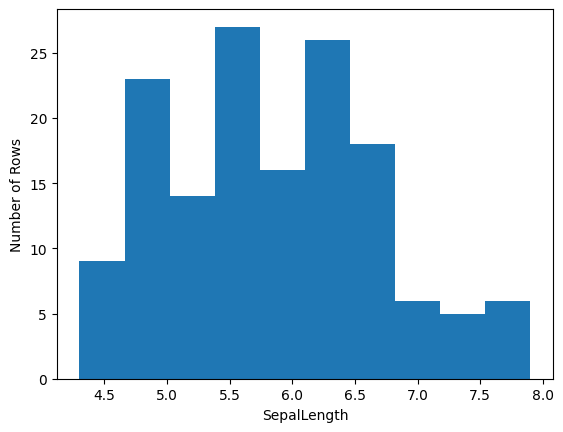

In [28]:
# put your answer here
# HISTOGRAM
plt.hist(df["SepalLengthCm"])
plt.xlabel('SepalLength')
plt.ylabel('Number of Rows')
plt.show()

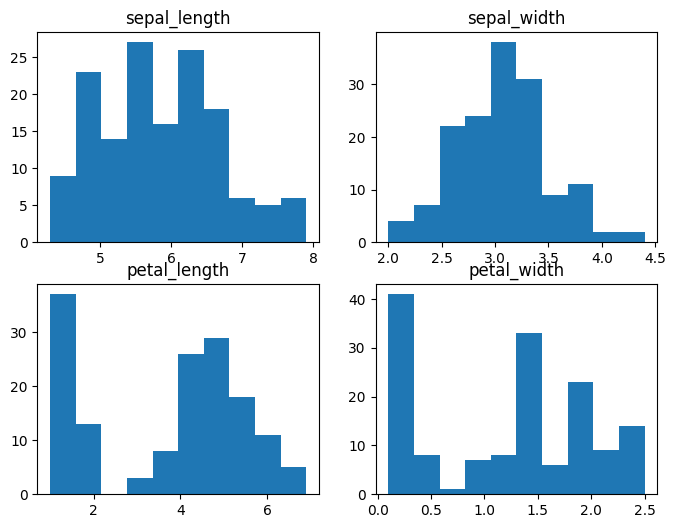

In [32]:
fig, ax = plt.subplots(2,2, figsize = (8,6))

ax[0, 0].hist(df["SepalLengthCm"])
ax[0, 1].hist(df["SepalWidthCm"])
ax[1, 0].hist(df["PetalLengthCm"])
ax[1, 1].hist(df["PetalWidthCm"])

ax[0, 0].set_title("sepal_length")
ax[0, 1].set_title("sepal_width")
ax[1, 0].set_title("petal_length")
ax[1, 1].set_title("petal_width")
plt.show()

In [34]:
colors = {'Iris-setosa': 'purple',
          'Iris-virginica': 'pink',
          'Iris-versicolor': 'yellow'}

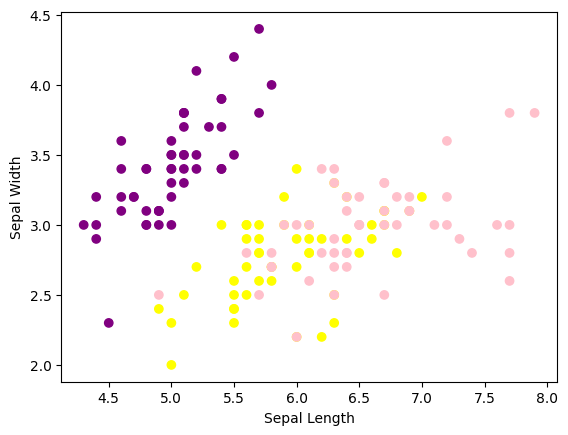

In [35]:
# SCATTER PLOT
plt.scatter(df["SepalLengthCm"],
            df["SepalWidthCm"],
            c = df['Species'].map(colors))
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

plt.show()

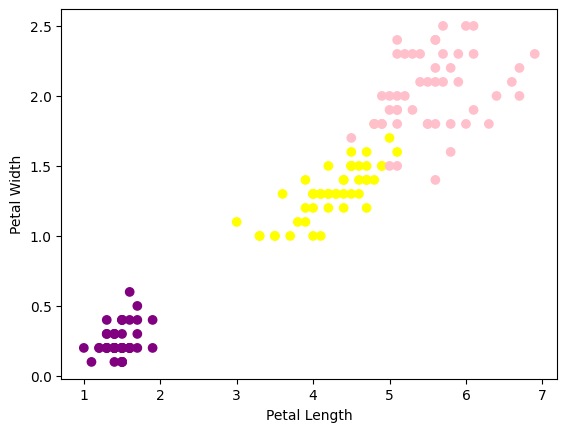

In [36]:
# SCATTER PLOT
plt.scatter(df["PetalLengthCm"],
            df["PetalWidthCm"],
            c = df['Species'].map(colors))
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

plt.show()

4. Split the dataset into a training set and a testing set

In [44]:
# put your answer here

# Array of features
x = df.drop(columns = ['Species']).values

# Array of Labels
y = df['Species'].values

print("FOR X")
print("Number of shape:", x.shape)
print("Number of dimension:", x.ndim)

print("\nFOR Y")
print("Number of shape:", y.shape)
print("Number of dimension:", y.ndim)

FOR X
Number of shape: (150, 4)
Number of dimension: 2

FOR Y
Number of shape: (150,)
Number of dimension: 1


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


5. Train the model

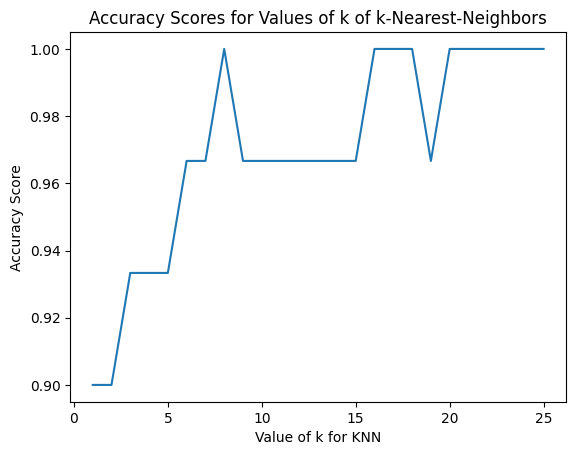

In [51]:
# put your answer here

# experimenting with different n values
k_range = list(range(1,26))
scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)

  #Train the model
  knn.fit(x_train, y_train)

  #Test the model
  y_pred = knn.predict(x_test)
  scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')

plt.show()

In [54]:
knn = KNeighborsClassifier(n_neighbors = 13)

#Train the model
knn.fit(x_train, y_train)

#Test the model
y_pred = knn.predict(x_test)
metrics.accuracy_score(y_test, y_pred)


0.9666666666666667

6. Test the model

In [55]:
# put your answer here

knn.predict([[6, 9, 6, 9]])

array(['Iris-virginica'], dtype=object)